In [130]:
import pandas as pd


results_df = pd.read_csv('/Users/niveditaj/Downloads/f1db_csv/results.csv')  # Replace 'path/to/results.csv' with the actual path to your Results CSV file
races_df = pd.read_csv('/Users/niveditaj/Downloads/f1db_csv/races.csv') 
drivers_df = pd.read_csv('/Users/niveditaj/Downloads/f1db_csv/drivers.csv')
constructors_df = pd.read_csv('/Users/niveditaj/Downloads/f1db_csv/constructors.csv')
constructor_standings_df = pd.read_csv('/Users/niveditaj/Downloads/f1db_csv/constructor_standings.csv')
status_df=pd.read_csv('/Users/niveditaj/Downloads/f1db_csv/status.csv')
lap_times_df= pd.read_csv('/Users/niveditaj/Downloads/f1db_csv/lap_times.csv')
pit_stops_df= pd.read_csv('/Users/niveditaj/Downloads/f1db_csv/pit_stops.csv')
constructor_results_df= pd.read_csv('/Users/niveditaj/Downloads/f1db_csv/constructor_results.csv')

In [131]:
results_df = results_df.drop(columns=['time', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed'])
print(results_df)

       resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
26175     26181    1115       807            210     27    14       16   
26176     26182    1115       859            213     40    17       17   
26177     26183    1115       858              3      2    15       \N   
26178     26184    1115         1            131     44     3       \N   
26179     26185    1115       832              6     55    12       \N   

      positionText  positionOrder  points  laps milliseconds rank  statusId  
0                1              1

In [132]:
constructors_df = constructors_df.drop(columns=['url', 'nationality'])
print(constructors_df)

     constructorId constructorRef            name
0                1        mclaren         McLaren
1                2     bmw_sauber      BMW Sauber
2                3       williams        Williams
3                4        renault         Renault
4                5     toro_rosso      Toro Rosso
..             ...            ...             ...
206            209          manor  Manor Marussia
207            210           haas    Haas F1 Team
208            211   racing_point    Racing Point
209            213     alphatauri      AlphaTauri
210            214         alpine  Alpine F1 Team

[211 rows x 3 columns]


In [133]:
print(constructor_standings_df)

       constructorStandingsId  raceId  constructorId  points  position  \
0                           1      18              1    14.0         1   
1                           2      18              2     8.0         3   
2                           3      18              3     9.0         2   
3                           4      18              4     5.0         4   
4                           5      18              5     2.0         5   
...                       ...     ...            ...     ...       ...   
13096                   28624    1115            117   229.0         4   
13097                   28632    1115              1   219.0         5   
13098                   28623    1115              9   657.0         1   
13099                   28628    1115            214    90.0         6   
13100                   28625    1115              6   300.0         3   

      positionText  wins  
0                1     1  
1                3     0  
2                2     0  
3  

In [134]:
constructor_results_df = constructor_results_df.drop(columns=['status'])
print(constructor_results_df)

       constructorResultsId  raceId  constructorId  points
0                         1      18              1    14.0
1                         2      18              2     8.0
2                         3      18              3     9.0
3                         4      18              4     5.0
4                         5      18              5     2.0
...                     ...     ...            ...     ...
12335                 16835    1115            214     6.0
12336                 16836    1115             51     6.0
12337                 16837    1115              3     1.0
12338                 16838    1115            210     0.0
12339                 16839    1115            213     0.0

[12340 rows x 4 columns]


In [135]:
races_df = races_df.drop(columns=['date', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'])
print(races_df)

      raceId  year  round  circuitId                      name      time
0          1  2009      1          1     Australian Grand Prix  06:00:00
1          2  2009      2          2      Malaysian Grand Prix  09:00:00
2          3  2009      3         17        Chinese Grand Prix  07:00:00
3          4  2009      4          3        Bahrain Grand Prix  12:00:00
4          5  2009      5          4        Spanish Grand Prix  12:00:00
...      ...   ...    ...        ...                       ...       ...
1096    1116  2023     18         69  United States Grand Prix  19:00:00
1097    1117  2023     19         32    Mexico City Grand Prix  20:00:00
1098    1118  2023     20         18      São Paulo Grand Prix  17:00:00
1099    1119  2023     21         80      Las Vegas Grand Prix  06:00:00
1100    1120  2023     22         24      Abu Dhabi Grand Prix  13:00:00

[1101 rows x 6 columns]


In [136]:


# First, merge constructors_df with constructor_standings_df
merged_df = pd.merge(constructors_df, constructor_standings_df, on='constructorId', how='inner')

# Then, merge the result with constructor_results_df
final_df = pd.merge(merged_df, constructor_results_df, on=['constructorId', 'raceId'], how='inner')

# Finally, merge with the results_df
final_df = pd.merge(final_df, results_df, on=['constructorId', 'raceId'], how='inner')

# Merge races_df with final_df using 'raceId'
final_df = pd.merge(final_df, races_df, on='raceId', how='inner')

# Display the updated final DataFrame

In [137]:
print(final_df)

       constructorId  constructorRef               name_x  \
0                  1         mclaren              McLaren   
1                  1         mclaren              McLaren   
2                  2      bmw_sauber           BMW Sauber   
3                  2      bmw_sauber           BMW Sauber   
4                  3        williams             Williams   
...              ...             ...                  ...   
24303            188   mclaren-seren  McLaren-Serenissima   
24304            189    eagle-climax         Eagle-Climax   
24305            191   brabham-repco        Brabham-Repco   
24306            191   brabham-repco        Brabham-Repco   
24307            192  cooper-ferrari       Cooper-Ferrari   

       constructorStandingsId  raceId  points_x  position_x positionText_x  \
0                           1      18      14.0           1              1   
1                           1      18      14.0           1              1   
2                           2    

               points_x  position_x      wins  positionOrder    points
points_x       1.000000   -0.434142  0.696809      -0.317116  0.637815
position_x    -0.434142    1.000000 -0.480847       0.551322 -0.426359
wins           0.696809   -0.480847  1.000000      -0.298966  0.467587
positionOrder -0.317116    0.551322 -0.298966       1.000000 -0.580589
points         0.637815   -0.426359  0.467587      -0.580589  1.000000


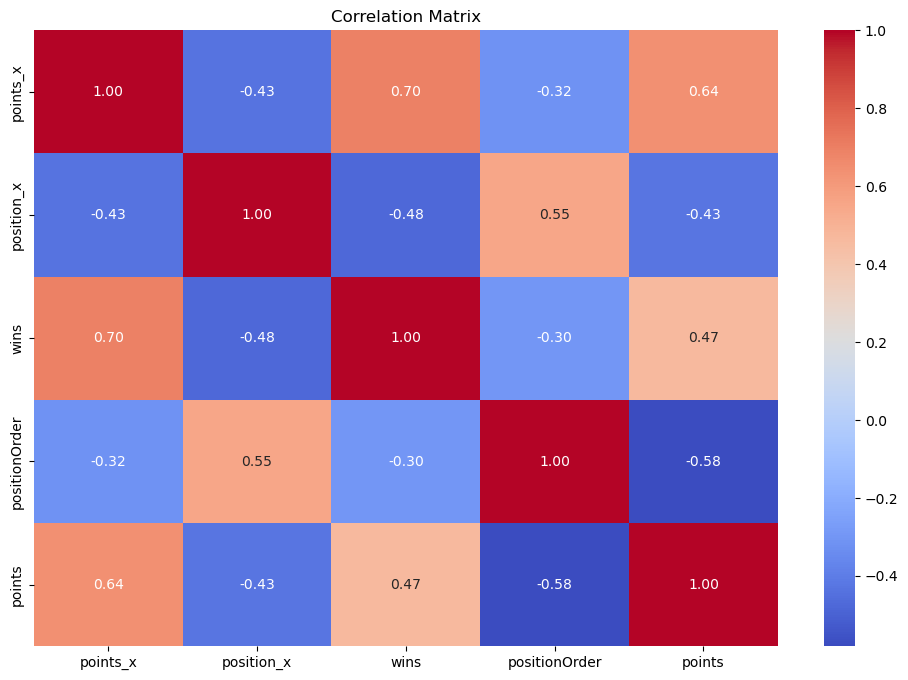

       constructorId  constructorRef               name_x  \
0                  1         mclaren              McLaren   
1                  1         mclaren              McLaren   
2                  2      bmw_sauber           BMW Sauber   
3                  2      bmw_sauber           BMW Sauber   
4                  3        williams             Williams   
...              ...             ...                  ...   
24303            188   mclaren-seren  McLaren-Serenissima   
24304            189    eagle-climax         Eagle-Climax   
24305            191   brabham-repco        Brabham-Repco   
24306            191   brabham-repco        Brabham-Repco   
24307            192  cooper-ferrari       Cooper-Ferrari   

       constructorStandingsId  raceId  points_x  position_x positionText_x  \
0                           1      18      14.0           1              1   
1                           1      18      14.0           1              1   
2                           2    

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select relevant columns for the correlation matrix
selected_columns = [
    'points_x', 'position_x',
    'wins', 'positionOrder', 'points','milliseconds',
]

# Create a new DataFrame with selected columns
selected_df = final_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
print(final_df)

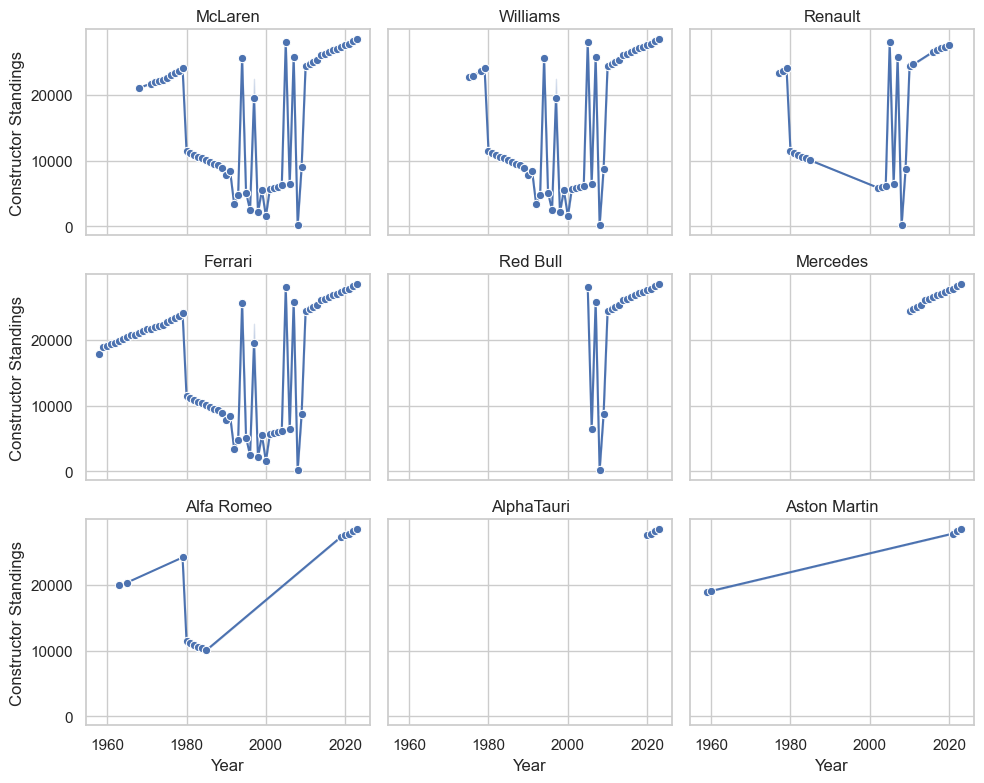

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of constructors to include
selected_constructors = ['McLaren', 'Williams', 'Renault', 'Ferrari', 'Red Bull', 'Mercedes', 'Alfa Romeo', 'AlphaTauri', 'Aston Martin']

# Filter the DataFrame for selected constructors
selected_df = final_df[final_df['name_x'].isin(selected_constructors)]

# Select relevant columns
constructor_performance = selected_df[['year', 'name_x', 'constructorStandingsId']]

# Create a 3x3 matrix of subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 8), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = np.ravel(axes)

# Iterate over selected constructors and plot in each subplot
for i, constructor in enumerate(selected_constructors):
    constructor_data = constructor_performance[constructor_performance['name_x'] == constructor]
    sns.lineplot(x='year', y='constructorStandingsId', data=constructor_data, ax=axes[i], marker='o')
    axes[i].set_title(constructor)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Constructor Standings')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


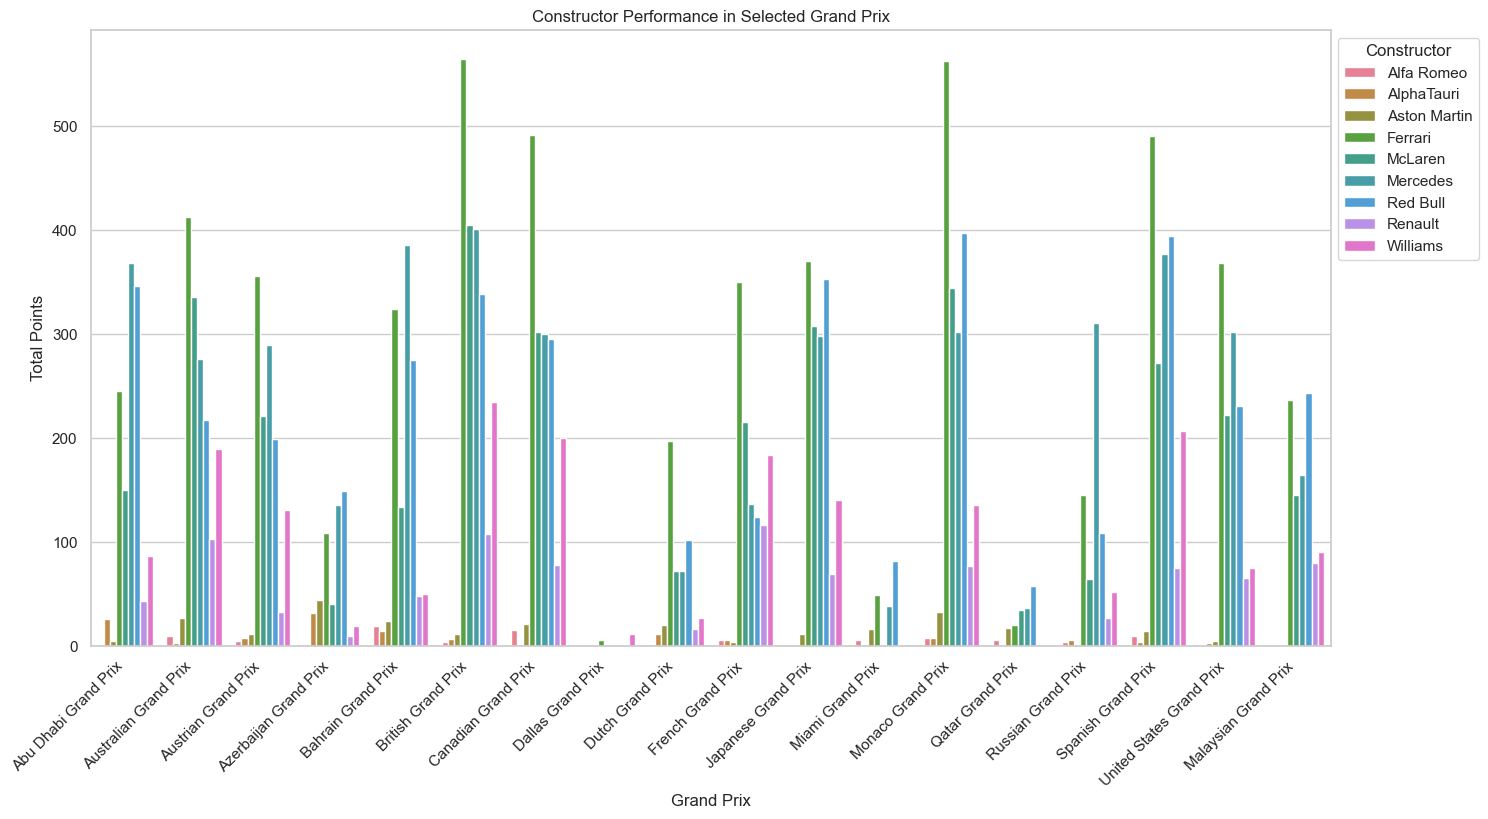

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of constructors to include
selected_constructors = ['McLaren', 'Williams', 'Renault', 'Ferrari', 'Red Bull', 'Mercedes', 'Alfa Romeo', 'AlphaTauri', 'Aston Martin']

# List of selected Grand Prix events with "Grand Prix" added
selected_grand_prix = [
    'Abu Dhabi Grand Prix', 'Australian Grand Prix', 'Austrian Grand Prix', 'Azerbaijan Grand Prix',
    'Bahrain Grand Prix', 'British Grand Prix', 'Canadian Grand Prix', 'Dallas Grand Prix', 'Dutch Grand Prix',
    'French Grand Prix', 'Japanese Grand Prix', 'Malaysian Grand Prix', 'Miami Grand Prix', 'Monaco Grand Prix',
    'Qatar Grand Prix', 'Russian Grand Prix', 'Spanish Grand Prix', 'Sao Paulo Grand Prix', 'United States Grand Prix'
]

# Filter the DataFrame for selected constructors and Grand Prix events
selected_df = final_df[(final_df['name_x'].isin(selected_constructors)) & (final_df['name_y'].isin(selected_grand_prix))]

# Select relevant columns
constructor_gp_points = selected_df[['name_x', 'name_y', 'points']]

# Group by constructor and Grand Prix, then sum the points
constructor_gp_points_sum = constructor_gp_points.groupby(['name_x', 'name_y']).sum().reset_index()

# Define a custom color palette with distinct colors for each constructor
constructor_colors = sns.color_palette("husl", n_colors=len(selected_constructors))

# Plotting the grouped bar plot with custom colors
plt.figure(figsize=(16, 8))
sns.barplot(x='name_y', y='points', hue='name_x', data=constructor_gp_points_sum, palette=constructor_colors)
plt.title('Constructor Performance in Selected Grand Prix')
plt.xlabel('Grand Prix')
plt.ylabel('Total Points')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1, 1))
plt.show()
